<a href="https://colab.research.google.com/github/jenyadev3/store-product-analysis/blob/main/vkr_project_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ товарного ассортимента магазина

## Описание проекта

### Аналитическая задача

Провести анализ товарного ассортимента и определить какие товары входят в основной и дополнительный ассортимент.

Дополнительный ассортимент -- товары, которые можно предлагать как сопутствующие или располагать в прикассовой зоне.

### Описание данных
|Признак | Комментарий|
|--:|:--|
|`date` | дата заказа|
|`customer_id` | идентификатор покупателя|
|`order_id` | идентификатор заказа|
|`product` | наименование товара|
|`quantity` | количество товара в заказе|
|`price` | цена товара|

Примерная последовательность выполнения работ

Шаг 1. Загрузка данных
- Загрузка данных и предварительный анализ

Шаг 2. Подготовка данных (при необходимости)
- Корректировка заголовков;
- Корректировка типов признаков;
- Поиск дублей, аномальных и пропущенных значений;
- Добавление новых столбцов.

Шаг 3. Исследовательский анализ данных
- Построить диаграмму количества покупок по дням;
- Построить диаграмму, отображающую сумму покупок по дням;
- Построить гистограмму, отображающую распределение заказов по сумме.

Шаг 4. Анализ торгового асортимента
- На основании наименования товара и данных открытых внешних источников предложить 3-10 категорий товаров;
- В каждой категории распределить товары на основной и дополнительный ассортимент.

**Шаг 1. Загрузка данных**

    Загрузка данных и предварительный анализ


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
df = pd.read_csv("/content/vkr_project_retail.csv")

In [46]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


**Шаг 2. Подготовка данных (при необходимости)**

    Корректировка заголовков;
    Корректировка типов признаков;
    Поиск дублей, аномальных и пропущенных значений;
    Добавление новых столбцов.



Добавление нового столбца (сумма за весь заказ):

In [47]:
df["total_price"] = df["quantity"]*df["price"]

Корректировка типов:

In [48]:
df["date"]=pd.to_datetime(df["date"], format="%Y%m%d%H")
df["date"]=pd.to_datetime(df["date"].dt.date)

Поиск дублей:

In [49]:
dupes = df.duplicated()
dupes.sum()

np.int64(966)

In [50]:
#Поиск повторяющихся заказов, но которые могут отличаться по цене (если цена вдруг поменялась или ошибка)
dupes_gr = df.groupby(["date","customer_id","product","quantity"])["price"].nunique()
price_diff = dupes_gr[dupes_gr > 1]
print(price_diff)

date        customer_id                           product                    quantity
2019-01-17  595c636d-2625-494f-8c98-b342bd4fbb9f  Алоэ Вера d-12 см h-25 см  1           2
Name: price, dtype: int64


In [51]:
# поскольку нашелся такой заказ.
# смотрю как менялась цены (чтобы понять действительно ли цена менялась или это ошибка )
df[df["product"] == 'Алоэ Вера d-12 см h-25 см']

,date,customer_id,order_id,product,quantity,price,total_price
1533,2019-01-17,595c636d-2625-494f-8c98-b342bd4fbb9f,69861,Алоэ Вера d-12 см h-25 см,1,134.0,134.0
1535,2019-01-17,595c636d-2625-494f-8c98-b342bd4fbb9f,69861,Алоэ Вера d-12 см h-25 см,1,239.0,239.0
1998,2019-02-25,a341edb8-9b67-4292-b81a-a0675d25e4fe,70437,Алоэ Вера d-12 см h-25 см,1,134.0,134.0


In [52]:
# удаляю дубликаты у которых значения повторяются по всем столбцам:
df = df.drop_duplicates()

In [53]:
# Оставляем все строки, кроме конкретной лишней цены для Алоэ Вера
df = df[~((df['product'] == 'Алоэ Вера d-12 см h-25 см') & (df['price'] == 239))]


Поиск "скрытых пропусков", которые не показывают info и describe

In [ ]:
(df == "").sum()
(df == "NA").sum()

,0
date,0
customer_id,0
order_id,0
product,0
quantity,0
price,0
total_price,0


Поиск аномальных значений

In [ ]:
# есть ли отрицательные или нулевые значения:
print(df[df["quantity"] <=0])
print(df[df["price"] <=0])

Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price, total_price]
Index: []
Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price, total_price]
Index: []


In [ ]:
# макс.и мин.цена
min_price = df.loc[df["price"].idxmin()]
max_price = df.loc[df["price"].idxmax()]
print(min_price)
print(max_price)

date                                         2018-12-03 00:00:00
customer_id                 2c8b9386-2e8c-4ee9-8aa4-2b4875b68578
order_id                                                   14514
product        Алиссум (лобулярия) Снежные одежды 0,2 г 46500...
quantity                                                       2
price                                                        9.0
total_price                                                 18.0
Name: 1069, dtype: object
date                                         2019-07-29 00:00:00
customer_id                 0d87f4ae-465a-4fac-81e6-5d629761783e
order_id                                                   72139
product        Сушилка уличная Leifheit 85210 LINOMATIC V 400...
quantity                                                       1
price                                                    14917.0
total_price                                              14917.0
Name: 5992, dtype: object


In [ ]:
# мин. и макс. количество товара в заказе
min_quan = df.loc[df["quantity"].idxmin()]
max_quan = df.loc[df["quantity"].idxmax()]
print(min_quan)
print(max_quan)

date                                       2018-10-01 00:00:00
customer_id               ee47d746-6d2f-4d3c-9622-c31412542920
order_id                                                 68477
product        Комнатное растение в горшке Алое Вера, d12, h30
quantity                                                     1
price                                                    142.0
total_price                                              142.0
Name: 0, dtype: object
date                                         2019-06-18 00:00:00
customer_id                 312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6
order_id                                                   71743
product        Вантуз с деревянной ручкой d14 см красный, Bur...
quantity                                                    1000
price                                                      675.0
total_price                                             675000.0
Name: 5456, dtype: object


In [ ]:
# самые крупные заказы
df_sorted = df.sort_values(by="quantity",ascending=False).head(20)
print(df_sorted)

           date                           customer_id  order_id  \
5456 2019-06-18  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
5071 2019-06-11  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
3961 2019-05-20  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
1158 2018-12-10  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
568  2018-11-01  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
212  2018-10-11  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
266  2018-10-16  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
211  2018-10-11  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
2431 2019-03-23  685d3d84-aebb-485b-8e59-344b3df8b3d3     70841   
267  2018-10-16  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
586  2018-11-02  0c5aaa88-e346-4f87-8f7a-ad8cbc04e965     68831   
6707 2019-10-28  018fb729-3525-4314-8e4d-1982b1062f9f     73110   
6535 2019-10-07  d933280e-5372-448f-be44-b269c8bafc2a     72885   
1103 2018-12-04  7d255526-fcc2-4f79-b28a-217d7d2373a8     6920

In [ ]:
# создаю отдельную выборку для заказов с подозрительным количеством товаров
mask = (
    ((df["product"].str.contains("муляж",case=False)) & ((df["quantity"])>=100))
    |
    ((df["product"].str.contains("вантуз",case=False)) & ((df["quantity"])>=1000))
)
df_susp = df[mask]

#обычный список заказов без этих аномалий:

df_normal = df[~mask]

Сравнение сумм заказов: нормальные vs аномальные

/tmp/ipython-input-3232955497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal["type"] = "Нормальные заказы"
/tmp/ipython-input-3232955497.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_susp["type"] = "Аномальные заказы"


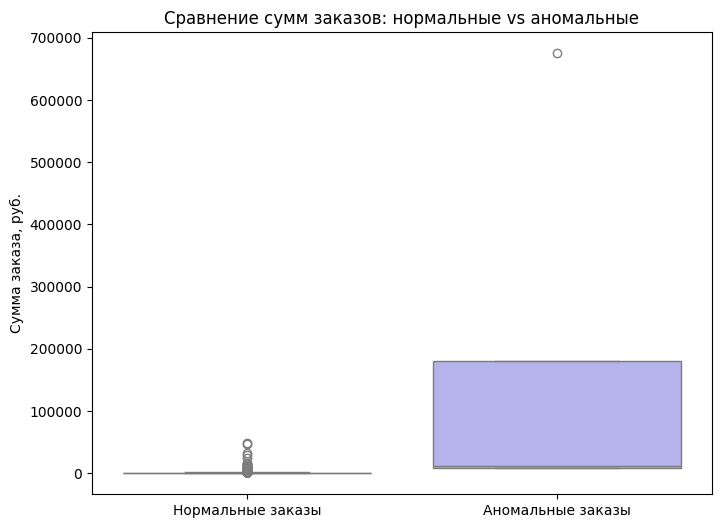

In [ ]:
# Объединяю два датафрейма для удобства графика и добавляем колонку с меткой

import matplotlib.pyplot as plt

df_normal["type"] = "Нормальные заказы"
df_susp["type"] = "Аномальные заказы"

df_plot = pd.concat([df_normal, df_susp], ignore_index=True)

# Строим ящик с усами
plt.figure(figsize=(8,6))
sns.boxplot(x="type", y="total_price", data=df_plot, color="#ABA9F5")
plt.title("Сравнение сумм заказов: нормальные vs аномальные")
plt.ylabel("Сумма заказа, руб.")
plt.xlabel('')
plt.show()

<Axes: xlabel='price', ylabel='quantity'>

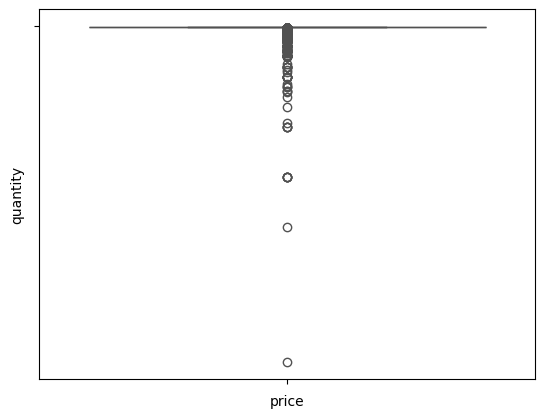

In [ ]:
# визуальные выбросы для нормальных заказов:

sns.boxplot(x=df_normal["price"])
sns.boxplot(y=df_normal["quantity"])


<Axes: xlabel='price', ylabel='quantity'>

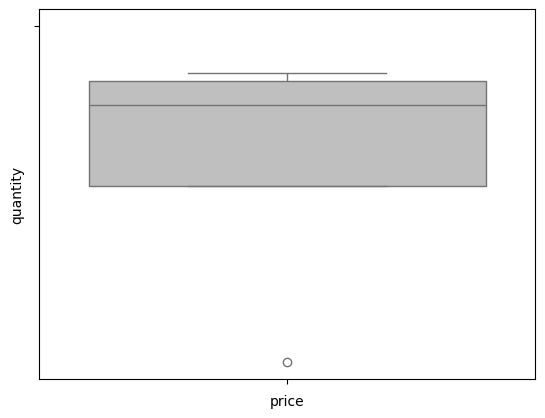

In [ ]:
# для аномальных
sns.boxplot(x=df_susp["price"], color="#8AA6A3")
sns.boxplot(y=df_susp["quantity"], color="#BFBFBF")


In [ ]:
# смотрю каждую ценовую категорию чтобы понять какие товары продаются, чтобы убедиться в корректности выводов:
cheap_price = df[df["price"] <= 2000]
medium_price = df[(df["price"] > 2000) & (df["price"] <= 6000)]
high_price = df[(df["price"] > 6000) & (df["price"] <= 10000)]
very_high = medium_price = df[(df["price"] > 10000)]

print(cheap_price[["product","price"]])
print(medium_price[["product","price"]])
print(high_price[["product","price"]])
print(very_high[["product","price"]])


                                                product   price
0       Комнатное растение в горшке Алое Вера, d12, h30   142.0
1     Комнатное растение в горшке Кофе Арабика, d12,...   194.0
2                           Радермахера d-12 см h-20 см   112.0
3                      Хризолидокарпус Лутесценс d-9 см   179.0
4                        Циперус Зумула d-12 см h-25 см   112.0
...                                                 ...     ...
6732  Таз пластмассовый 40,0 л пищевой овальный (Иж)...   404.0
6733         Сумка-тележка 2-х колесная Gimi Argo синяя  1087.0
6734  Герань домашняя (пеларгония зональная) цветуща...   157.0
6735  Таз пластмассовый со стиральной доской (Иж), 1...   397.0
6736         Сумка-тележка 2-х колесная Gimi Argo синяя  1087.0

[5477 rows x 2 columns]
                                                product    price
5992  Сушилка уличная Leifheit 85210 LINOMATIC V 400...  14917.0
                                                product   price
634   Сумка-т

**Вывод:**
Анализ цен показал, что основная масса товаров сосредоточена в диапазоне 0–2000 руб.(растения, тазы и.т.д) — это массовый сегмент. Средний сегмент 2000–6000 руб. включает доски гладильные, полки, котлы, встречается реже. В категории 6000–10000 руб. представлены дорогие товары, такие как сушилки и сумки-тележки.Их немного, но это не ошибка - просто редкий спрос на дорогие товары.
Минимальная цена составляет 9 рублей (семена растений).Семена часто стоят до 100 реблей, возможное объяснение низкой стоимости семян - акция, остатки и.т.д а максимальная 14т (сушилка) - разрыв не такой большой чтобы считать ее выбросом, просто верхняя граница ассортимента. Обе цены соответствуют реальным рыночным значениям.

По количеству было выявлено несколько позиций с нетипичными объёмами заказов. Например, 300 вешалок, 150 дверных пружин, 100 шпингалетов, 80 ножей итд. Такие заказы могут быть реальными - закупки партиями например для магазинов, гостиниц, школ и.т.д.
Что выглядит страно: муляжи фруктов в количестве 100-300 шт., это много для домашнего использования, но реально для дизайна или декора.
Покупка 1000 вантузов существенно выделяется на фоне остальных и не имеет рационального объяснения с точки зрения типичного спроса. Предположительно, данная запись имеет искусственное происхождение(может тестовый или ошибочный ввод данных).
Подозрительные заказы были помещены в отдельную выборку.

**Шаг 3. Исследовательский анализ данных**

Диаграмма количества покупок по дням

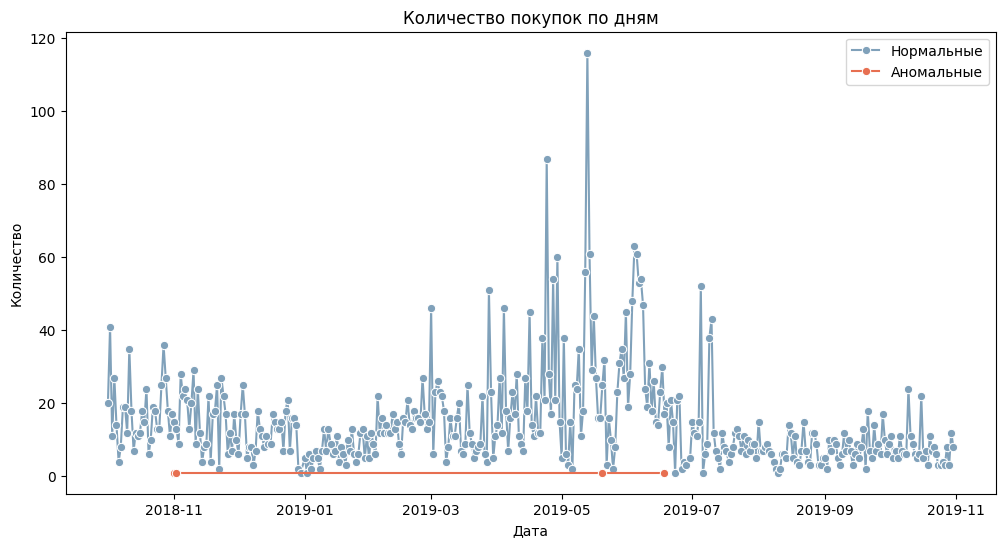

In [ ]:
daily_orders_normal = df_normal.groupby("date")["order_id"].count()
daily_orders_susp = df_susp.groupby("date")["order_id"].count()

plt.figure(figsize=(12,6))
sns.lineplot(x=daily_orders_normal.index, y=daily_orders_normal.values, marker="o", label="Нормальные", color="#80A1BA")
sns.lineplot(x=daily_orders_susp.index, y=daily_orders_susp.values, marker="o", label="Аномальные", color="#E76F51")
plt.title("Количество покупок по дням")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.legend()
plt.show()

Cумма покупок по дням

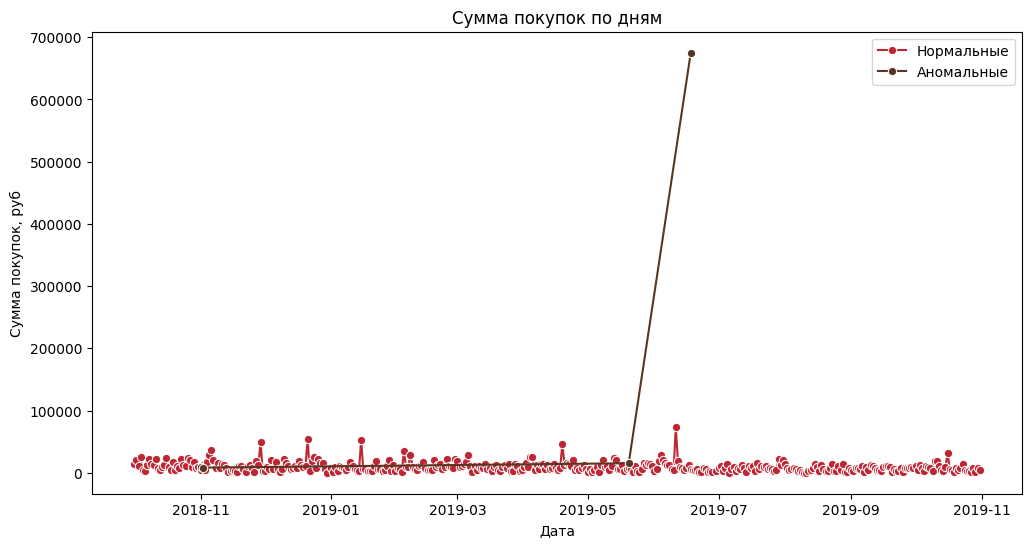

In [ ]:
daily_sales_norm = df_normal.groupby("date")["total_price"].sum()
daily_sales_susp = df_susp.groupby("date")["total_price"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(
     x=daily_sales_norm.index,
     y=daily_sales_norm.values,
     label = "Нормальные",
     marker="o",
     color="#BF2633",
     )
sns.lineplot(
     x=daily_sales_susp.index,
     y=daily_sales_susp.values,
     label = "Аномальные",
     marker="o",
     color="#593622",
     )
plt.title("Сумма покупок по дням")
plt.xlabel("Дата")
plt.ylabel("Сумма покупок, руб")
plt.show()

Гистограмма распределения заказов по суммам

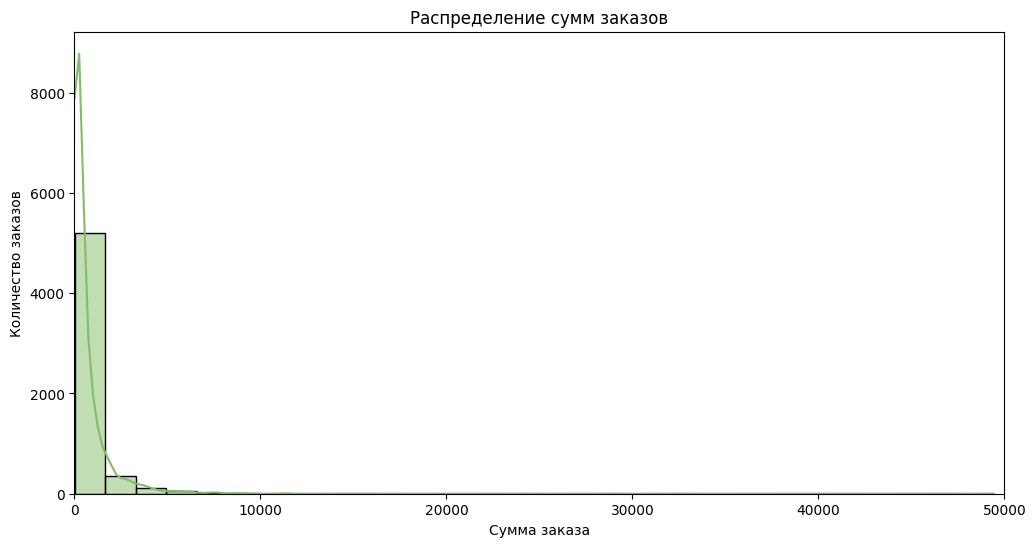

In [ ]:
# для нормальных значений
plt.figure(figsize=(12,6))
sns.histplot(df_normal["total_price"], bins=30, kde=True, color="#82BD68")
plt.title("Распределение сумм заказов")
plt.xlabel("Сумма заказа")
plt.ylabel("Количество заказов")
plt.xlim(0,50000)
plt.show()

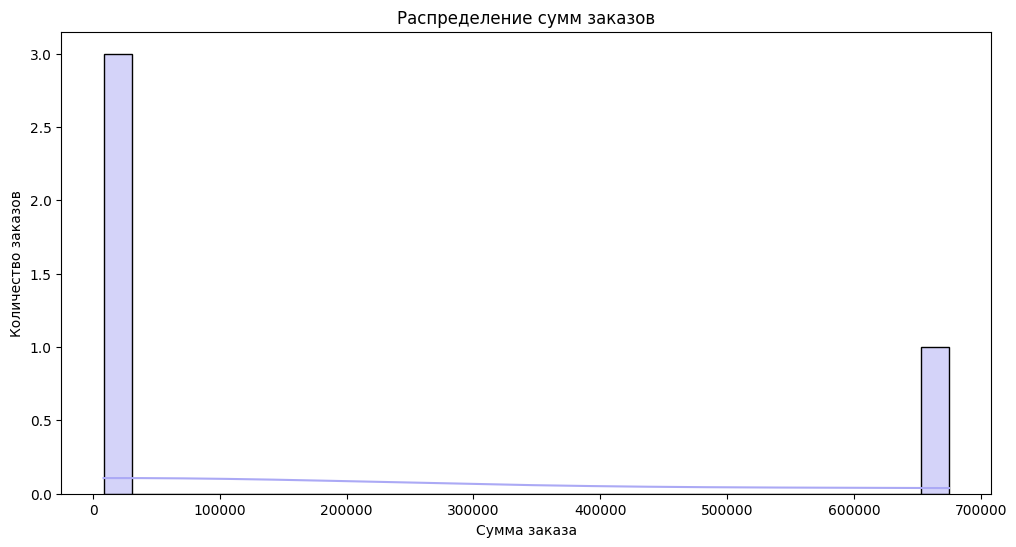

In [ ]:
# для подозрительных значений
plt.figure(figsize=(12,6))
sns.histplot(df_susp["total_price"], bins=30, kde=True, color="#ABA9F5")
plt.title("Распределение сумм заказов")
plt.xlabel("Сумма заказа")
plt.ylabel("Количество заказов")
plt.show()

Вывод:
- Количество покупок по дням:
Данные колеблются по времени: кол-во покупок то возрастает, то падает - нет стабильного тренда. Вмден сезонный/переодический характер продаж - весной наблюдается резкий рост. Все аномальные точки лежат внизу графика что говорит о днях с подозрительно малым числом покупок.
- Сумма покупок по дням:  
Видно что продажи шли равномерно, но произошел единичный резкий всплеск в сумме покупок т.е. сразу видно что некий заказ сильно выделяется среди остальных - превращается в огромный пик и классифицируется как аномальный.
- Распределение сумм заказов:
Для заказов с нормальными значениями сумм - большинство заказов на суммы до 100т., столбцы слева. Заказы на суммы 10т-50т редкие, судя по линии есть столбцы справа, но маленькие, почти невидимые.
Для странных заказов - большинство заказов до 100т. попали в левый участок графика, заказ на огромную сумму заметно выделяется правым столбцом.

Шаг 4. Анализ торгового асортимента

    На основании наименования товара и данных открытых внешних источников предложить 3-10 категорий товаров;
    В каждой категории распределить товары на основной и дополнительный ассортимент.


In [ ]:
# считаем частоту каждого слова (основные категории - самые часто встречающиеся слова)
import sqlite3

conn = sqlite3.connect(":memory")
df_normal.to_sql("my_table",conn,index=False,if_exists="replace")
df_normal.info()


df = pd.read_sql_query("""
SELECT
    product,                       -- оставляем название товара
    COUNT(product) AS count,        -- сколько раз покупали
    SUM(quantity) AS quantity,      -- суммарное количество продано
    CASE
        WHEN SUM(quantity) <= 10 THEN 'Низкий спрос'
        WHEN SUM(quantity) <= 50 THEN 'Средний спрос'
        ELSE 'Высокий спрос'
    END AS demand_category           -- новая колонка с уровнем спроса
FROM my_table
GROUP BY product
ORDER BY quantity DESC
""", conn)

#Товары с высоким спросом (основной ассортимент):
high_demand = df[df["demand_category"] == "Высокий спрос"]
print(high_demand)

#Товары с низким спросом :
low_demand = df[df["demand_category"] == "Низкий спрос"]
print(low_demand)
print(low_demand[0:50])

<class 'pandas.core.frame.DataFrame'>
Index: 5766 entries, 0 to 6736
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5766 non-null   datetime64[ns]
 1   customer_id  5766 non-null   object        
 2   order_id     5766 non-null   int64         
 3   product      5766 non-null   object        
 4   quantity     5766 non-null   int64         
 5   price        5766 non-null   float64       
 6   total_price  5766 non-null   float64       
 7   type         5766 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 405.4+ KB
                                              product  count  quantity  \
0    Вешалки мягкие для деликатных вещей 3 шт шоколад      2       335   
1                 Крепеж для пружины дверной, 1107055      3       320   
2                Муляж Яблоко зеленый 9 см полиуретан     10       308   
3   Пружина дверная 240 мм оци

Вывод:

В ходе анализабыло проведено агрегирование по количеству продаж и сумме проданных единиц. На основе топовых слов в названиях товаров и объёма продаж были выделены примерные категории товаров.Категории товаров распределены на основной ассортимент и дополнительный ассортимент по объёму продаж:
Основной ассортимент — товары с высоким и средним спросом.
Дополнительный ассортимент — товары с низким спросом

| Категория  | Основной ассортимент (пример)| Доп.ассортимент (пример)|
| :--------- | :------:                     | ----: |
| Сад| Пеларгония розебудная, однолетнее растение Петуния     | Рассада томата, герань домашняя |
| Дом  |Вешалки, щетка для посуды *ОЛЯ*,пружина дверная, муляжи (яблоко, лимон) ,ёрш деревяный |Автоматическая щетка Leifheit, ёрш пластмассовый, муляж перец
 Посуда       | Набор ножей Attribute,тарелка суповая Luminarc |Tepмокружка AVEX, тарелка десертная

Таким образом, анализ показал, что даже внутри одной категории (например, «Сад») есть товары с высоким и низким спросом, что говорит о необходимости дальнейшего управления ассортиментом.  классификации товаров.